In [1]:
# Arsitektur Convolutional Neural Network (CNN) Alexnet Untuk Klasifikasi Hama Pada Citra Daun Tanaman Kopi
# Implementasi Deep Learning Pada Identifikasi Jenis Tumbuhan Berdasarkan Citra Daun Menggunakan Convolutional Neural Network

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/gdrive/My Drive/Dataset/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/gdrive/My Drive/Dataset/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_raja_helena : 100
Jumlah kupu_pantat_merah : 95
Jumlah kupu_jojo : 100
Jumlah kupu_batik_cap : 100
Jumlah kupu_jarak : 100
Jumlah kupu_hijau_biru : 100
Jumlah kupu_harimau_kuning_hijau : 100
Jumlah kupu_raja_limau : 100


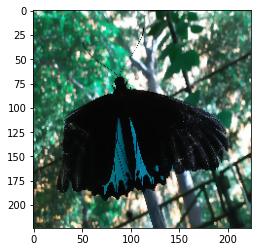

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)
y_train.shape

(532, 8)

In [5]:
len(y_test)

263

In [6]:
print(lb_arr)

['kupu_raja_helena', 'kupu_pantat_merah', 'kupu_jojo', 'kupu_batik_cap', 'kupu_jarak', 'kupu_hijau_biru', 'kupu_harimau_kuning_hijau', 'kupu_raja_limau']


In [7]:
# https://github.com/Ahmad-AlShalabi/Fish-detection/blob/master/Fish_Detection_Notebook.ipynb
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

tf.keras.backend.clear_session()

base_model = tf.keras.applications.resnet_v2.ResNet50V2(include_top=False, weights='imagenet', input_shape=(224,224,3), pooling=None )

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense  (8, activation='softmax')(x)

model = Model(base_model.input, x)

adam = Adam(lr=5e-4)
epochs = 10
lrate = 0.01
decay = lrate/epochs
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

94683136/94668760 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
# https://linuxtut.com/en/4bc6d6174bb3e8461c6d/
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
import torch
import torchvision

MODEL_DIR = "/content/gdrive/My Drive/ResNet/temp"

if not os.path.exists(MODEL_DIR):  #If the directory does not exist, create it.
    os.makedirs(MODEL_DIR)
checkpoint = ModelCheckpoint(filepath = os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"),
                             save_best_only=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=8, callbacks=[checkpoint])
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
67/67 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.7857

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


67/67 [==============================] - 325s 5s/step - loss: 0.6892 - accuracy: 0.7857 - val_loss: 6.6465 - val_accuracy: 0.3840
Epoch 2/10
67/67 [==============================] - 313s 5s/step - loss: 0.5256 - accuracy: 0.8741 - val_loss: 16.1864 - val_accuracy: 0.3460
Epoch 3/10
67/67 [==============================] - 314s 5s/step - loss: 0.4641 - accuracy: 0.8722 - val_loss: 4.5774 - val_accuracy: 0.6920
Epoch 4/10
67/67 [==============================] - 320s 5s/step - loss: 0.2964 - accuracy: 0.9267 - val_loss: 1.9883 - val_accuracy: 0.5399
Epoch 5/10
67/67 [==============================] - 312s 5s/step - loss: 0.2620 - accuracy: 0.9211 - val_loss: 5.1325 - val_accuracy: 0.5133
Epoch 6/10
67/67 [==============================] - 321s 5s/step - loss: 0.0790 - accuracy: 0.9793 - val_loss: 0.9934 - val_accuracy: 0.8403
Epoch 7/10
67/67 [==============================] - 319s 5s/step - loss: 0.1809 - accuracy: 0.9549 - val_loss: 0.6427 - val_accuracy: 0.8669
Epoch 8/10
67/67 [=====

In [9]:
model_json=model.to_json()
with open("/content/gdrive/My Drive/ResNet/temp/model.json","w") as file:
    file.write(model_json)
model.save_weights("/content/gdrive/My Drive/ResNet/temp/my_model.h5")
print("Model berhasil disimpan !! ")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Model berhasil disimpan !! 


In [10]:
from tensorflow.keras.models import model_from_json
json_file = open('/content/gdrive/My Drive/ResNet/temp/model.json','r')
loaded_model_json = json_file.read()
json_file.close()

load_model = model_from_json(loaded_model_json)
load_model.load_weights("/content/gdrive/My Drive/ResNet/temp/my_model.h5")

print("Loadded!")

Loadded!


In [11]:
load_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

9/9 [==============================] - 31s 3s/step - loss: 0.0331 - accuracy: 0.9924

Test accuracy: 0.9923954606056213


In [13]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

17/17 [==============================] - 62s 4s/step - loss: 0.0121 - accuracy: 0.9962

Train accuracy: 0.9962406158447266


In [14]:
#Graph drawing
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

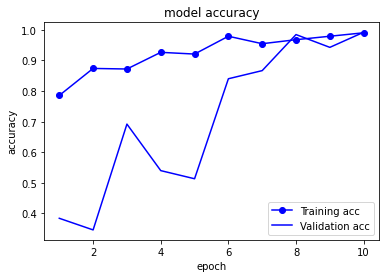

In [15]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

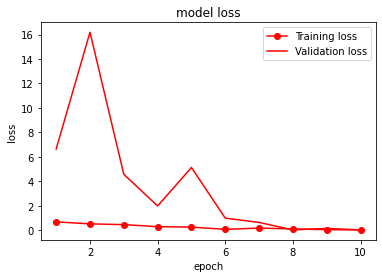

In [17]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       1.00      0.97      0.99        39
         kupu_raja_helena       1.00      1.00      1.00        25
          kupu_hijau_biru       1.00      1.00      1.00        34
           kupu_batik_cap       0.97      1.00      0.99        37
               kupu_jarak       1.00      1.00      1.00        33
          kupu_raja_limau       0.97      0.97      0.97        32
                kupu_jojo       1.00      1.00      1.00        30
        kupu_pantat_merah       1.00      1.00      1.00        33

                 accuracy                           0.99       263
                macro avg       0.99      0.99      0.99       263
             weighted avg       0.99      0.99      0.99       263



In [21]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([6, 6, 0, 5, 0, 7, 3, 6, 5, 6, 5, 2, 6, 0, 3, 3, 2, 6, 7, 6, 4, 5,
       6, 7, 6, 0, 2, 3, 6, 7, 2, 0, 5, 6, 0, 0, 6, 3, 7, 3, 1, 2, 1, 6,
       5, 5, 4, 4, 6, 4, 2, 1, 7, 5, 3, 3, 3, 7, 2, 1, 4, 4, 6, 4, 2, 5,
       0, 5, 3, 0, 5, 1, 7, 0, 0, 2, 5, 5, 6, 7, 7, 1, 0, 0, 5, 3, 7, 4,
       3, 0, 3, 7, 4, 7, 6, 6, 7, 5, 0, 7, 1, 4, 0, 1, 0, 2, 3, 7, 2, 7,
       4, 4, 0, 0, 7, 1, 2, 4, 2, 2, 4, 7, 1, 7, 2, 2, 2, 0, 2, 3, 6, 7,
       0, 6, 4, 6, 7, 4, 6, 4, 2, 5, 4, 2, 0, 5, 1, 3, 5, 3, 3, 0, 3, 4,
       5, 5, 4, 7, 5, 3, 2, 4, 3, 4, 3, 0, 1, 5, 3, 3, 7, 7, 1, 3, 2, 4,
       0, 4, 6, 7, 6, 6, 2, 2, 3, 0, 6, 3, 2, 6, 6, 3, 2, 5, 3, 0, 7, 1,
       4, 3, 2, 1, 0, 5, 1, 0, 0, 7, 4, 3, 4, 1, 0, 1, 1, 0, 6, 1, 2, 5,
       5, 1, 4, 3, 1, 5, 0, 3, 7, 0, 5, 4, 1, 2, 2, 2, 3, 3, 1, 5, 5, 4,
       7, 4, 0, 4, 1, 7, 0, 2, 7, 4, 2, 2, 5, 3, 0, 5, 3, 3, 0, 6, 7])

In [22]:
y_test_class = np.argmax(y_test, axis=1)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9923954372623575


array([[38,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]])

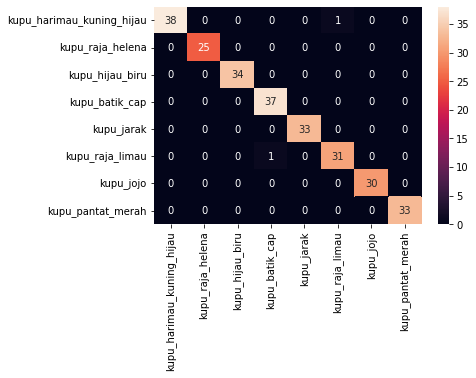

In [24]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"], 
           yticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"])